## Installing the Library

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
pip install google-cloud-audit-log==0.2.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import hydrodataset

In [3]:
import os
from hydrodataset.camels import Camels
camels = Camels(data_path=os.path.join("camels", "camels_us"), download=True, region="US")

In [4]:
gage_ids = camels.read_object_ids()

In [5]:
gage_ids[0]

'01013500'

## Fetching Daily Meteorological Data

In [6]:
mean_forcing = camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["dayl", "prcp", "srad", "swe","tmax", "tmin", "vp"]
)

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.68it/s]


In [7]:
print(mean_forcing.shape)

(1, 12691, 7)


In [8]:
dayl_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["dayl"]
).ravel()


Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.98it/s]


In [9]:
prcp_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["prcp"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.87it/s]


In [10]:
srad_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["srad"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.97it/s]


In [11]:
swe_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["swe"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.89it/s]


In [12]:
tmax_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["tmax"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]


In [13]:
tmin_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"], var_lst=["tmin"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.40it/s]


In [14]:
vp_l= camels.read_relevant_cols(
   gage_ids[:1], ["1980-01-01", "2014-09-30"],var_lst=["vp"]
).ravel()

Read forcing data of CAMELS-US: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.70it/s]


In [15]:
streamflow_l= camels.read_target_cols(
    gage_ids[:1], ["1980-01-01", "2014-09-30"], target_cols=["usgsFlow"]
).ravel()

Read streamflow data of CAMELS-US: 100%|█████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.60it/s]


## Convert to DataFrame
["dayl", "prcp", "srad", "swe","tmax", "tmin", "vp"]

In [16]:
dayL = pd.DataFrame(dayl_l,columns=["dayl"])

In [17]:
dayL.tail

<bound method NDFrame.tail of            dayl
0      30172.51
1      30253.10
2      30344.18
3      30408.33
4      30413.48
...         ...
12686  42163.23
12687  42163.23
12688  41817.62
12689  41616.29
12690  41472.05

[12691 rows x 1 columns]>

In [18]:
prcpL = pd.DataFrame(prcp_l,columns=["prcp"])

In [19]:
print(prcpL)

       prcp
0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
...     ...
12686  0.00
12687  0.00
12688  0.00
12689  0.00
12690  2.91

[12691 rows x 1 columns]


In [20]:
sradL = pd.DataFrame(srad_l,columns=["srad"])

In [21]:
sweL = pd.DataFrame(swe_l,columns=["swe"])

In [22]:
tmaxL = pd.DataFrame(tmax_l,columns=["tmax"])

In [23]:
tminL = pd.DataFrame(tmin_l,columns=["tmin"])

In [24]:
vpL = pd.DataFrame(vp_l,columns=["vpl"])

## Streamflow Data

In [25]:
streamflow_l= camels.read_target_cols(
    gage_ids[:1], ["1980-01-01", "2014-09-30"], target_cols=["usgsFlow"]
).ravel()

Read streamflow data of CAMELS-US: 100%|█████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.81it/s]


In [26]:
streamflowL = pd.DataFrame(streamflow_l,columns=["streamflow"])

In [27]:
data = pd.concat([dayL,prcpL,sradL,sweL,tmaxL,tminL,vpL,streamflowL],axis=1)

In [28]:
print(data)

           dayl  prcp    srad  swe   tmax   tmin      vpl  streamflow
0      30172.51  0.00  153.40  0.0  -6.54 -16.30   171.69       655.0
1      30253.10  0.00  145.27  0.0  -6.18 -15.22   185.94       640.0
2      30344.18  0.00  146.96  0.0  -9.89 -18.86   138.39       625.0
3      30408.33  0.00  146.20  0.0 -10.98 -19.76   120.06       620.0
4      30413.48  0.00  170.43  0.0 -11.29 -22.21   117.87       605.0
...         ...   ...     ...  ...    ...    ...      ...         ...
12686  42163.23  0.00  372.47  0.0  20.66   3.56   790.41       213.0
12687  42163.23  0.00  353.21  0.0  22.94   6.94   995.08       207.0
12688  41817.62  0.00  313.64  0.0  22.57   9.53  1202.24       200.0
12689  41616.29  0.00  341.55  0.0  26.01   9.66  1212.80       196.0
12690  41472.05  2.91  255.65  0.0  17.53   5.48   904.53       189.0

[12691 rows x 8 columns]


In [29]:
data['date'] = pd.date_range(start='1980-01-01', periods=len(data), freq='D')

In [30]:
print(data)

           dayl  prcp    srad  swe   tmax   tmin      vpl  streamflow  \
0      30172.51  0.00  153.40  0.0  -6.54 -16.30   171.69       655.0   
1      30253.10  0.00  145.27  0.0  -6.18 -15.22   185.94       640.0   
2      30344.18  0.00  146.96  0.0  -9.89 -18.86   138.39       625.0   
3      30408.33  0.00  146.20  0.0 -10.98 -19.76   120.06       620.0   
4      30413.48  0.00  170.43  0.0 -11.29 -22.21   117.87       605.0   
...         ...   ...     ...  ...    ...    ...      ...         ...   
12686  42163.23  0.00  372.47  0.0  20.66   3.56   790.41       213.0   
12687  42163.23  0.00  353.21  0.0  22.94   6.94   995.08       207.0   
12688  41817.62  0.00  313.64  0.0  22.57   9.53  1202.24       200.0   
12689  41616.29  0.00  341.55  0.0  26.01   9.66  1212.80       196.0   
12690  41472.05  2.91  255.65  0.0  17.53   5.48   904.53       189.0   

            date  
0     1980-01-01  
1     1980-01-02  
2     1980-01-03  
3     1980-01-04  
4     1980-01-05  
...      

In [31]:
df = data
print(df)

           dayl  prcp    srad  swe   tmax   tmin      vpl  streamflow  \
0      30172.51  0.00  153.40  0.0  -6.54 -16.30   171.69       655.0   
1      30253.10  0.00  145.27  0.0  -6.18 -15.22   185.94       640.0   
2      30344.18  0.00  146.96  0.0  -9.89 -18.86   138.39       625.0   
3      30408.33  0.00  146.20  0.0 -10.98 -19.76   120.06       620.0   
4      30413.48  0.00  170.43  0.0 -11.29 -22.21   117.87       605.0   
...         ...   ...     ...  ...    ...    ...      ...         ...   
12686  42163.23  0.00  372.47  0.0  20.66   3.56   790.41       213.0   
12687  42163.23  0.00  353.21  0.0  22.94   6.94   995.08       207.0   
12688  41817.62  0.00  313.64  0.0  22.57   9.53  1202.24       200.0   
12689  41616.29  0.00  341.55  0.0  26.01   9.66  1212.80       196.0   
12690  41472.05  2.91  255.65  0.0  17.53   5.48   904.53       189.0   

            date  
0     1980-01-01  
1     1980-01-02  
2     1980-01-03  
3     1980-01-04  
4     1980-01-05  
...      

# EDA

In [32]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')


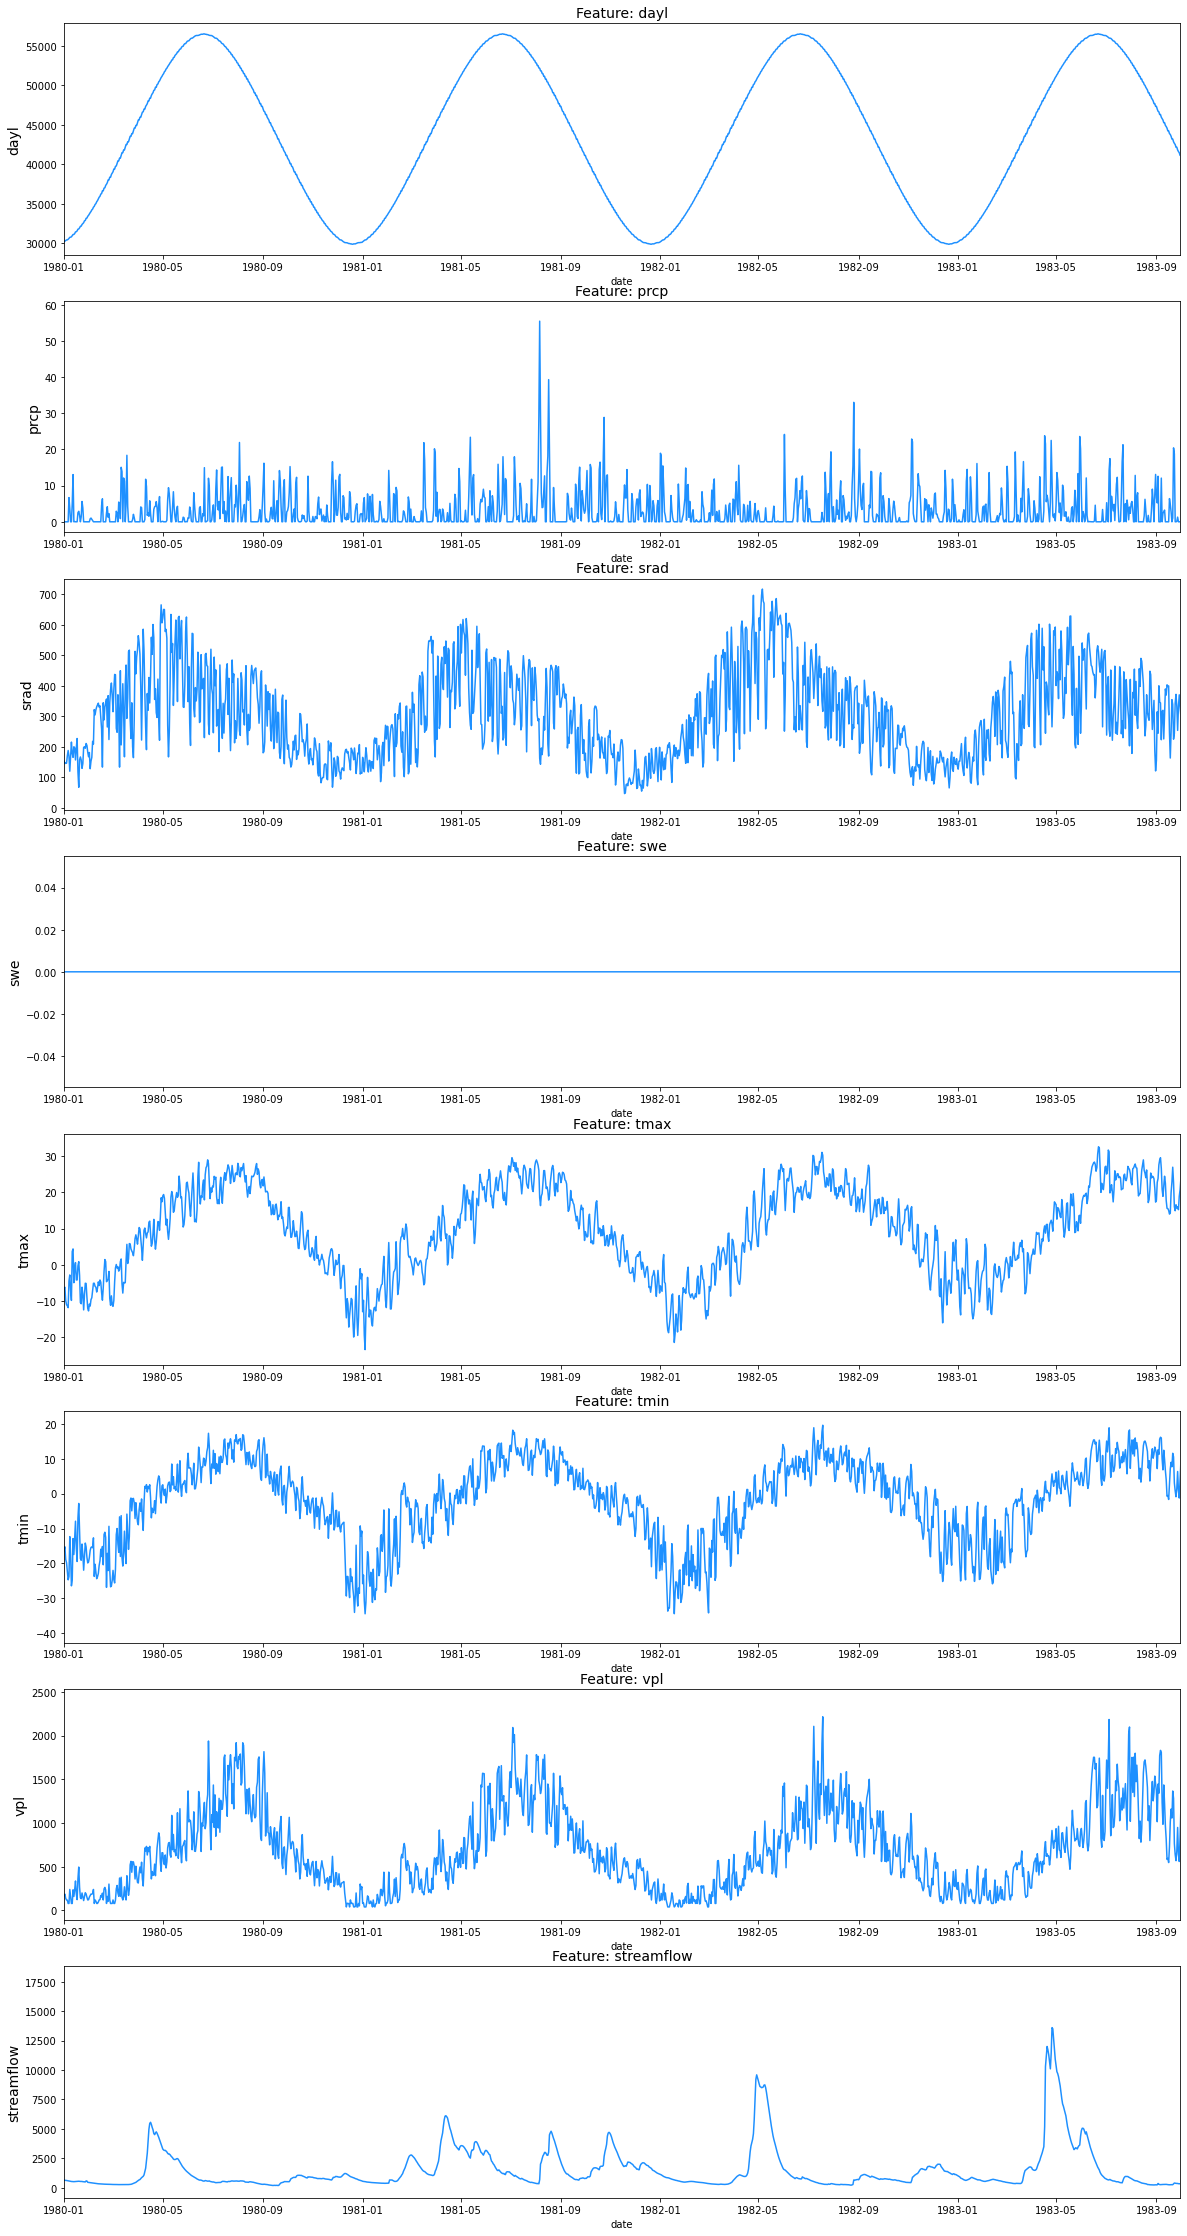

In [33]:
f, ax = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(1980, 1, 1), date(1983, 9, 30)]) 
                      
  

## Correlation Analysis

Correlation matrix is : 


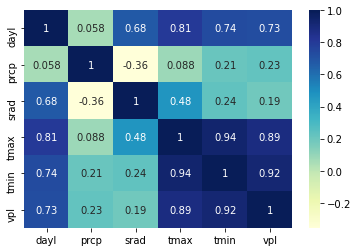

In [34]:

core_columns =  [
    'dayl','prcp', 'srad', 'tmax' ,'tmin', 'vpl'
]
corrmat = df[core_columns].corr()

print("Correlation matrix is : ")

dataplot = sns.heatmap(corrmat, cmap="YlGnBu", annot=True)
  
# displaying heatmap


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Clean the data by removing missing values
data = df
data = data.dropna()

# Transform the data by applying a log transformation
data = data.apply(np.log)

# Create lagged variables by shifting the data by one time step
data["lagged_variable_1"] = data["variable_1"].shift(1)
data["lagged_variable_2"] = data["variable_2"].shift(1)





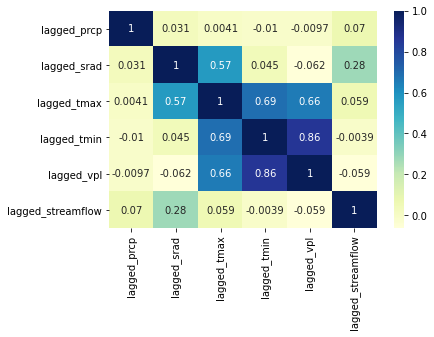

In [107]:
from scipy.stats import pearsonr
data = df.drop(['date','swe'],axis=1)

# Transform the data by applying a log transformation
data = data.apply(np.log)
data = data.dropna()

# Create lagged variables by shifting the data by one time step
data["lagged_dayl"] = data["dayl"].shift(365)
data["lagged_prcp"] = data["prcp"].shift(65)
data["lagged_srad"] = data["srad"].shift(365)
# data["lagged_swe"] = data["swe"].shift(1)
data["lagged_tmax"] = data["tmax"].shift(365)
data["lagged_tmin"] = data["tmin"].shift(365)
data["lagged_vpl"] = data["vpl"].shift(365)
data["lagged_streamflow"] = data["streamflow"].shift(35)



core_columns =  [
   'lagged_prcp', 'lagged_srad','lagged_tmax', 'lagged_tmin','lagged_vpl',"lagged_streamflow"
]
corrmat = data[core_columns].corr()
# # # Calculate the partial correlation between the streamflow variable and each lagged variable
# r1, p1 = pearsonr(data["streamflow"], data["lagged_prcp"])
# r2, p2 = pearsonr(data["streamflow"], data["lagged_variable_2"])
dataplot = sns.heatmap(corrmat, cmap="YlGnBu", annot=True)


In [35]:
df = df.drop(['dayl','swe'],axis=1)

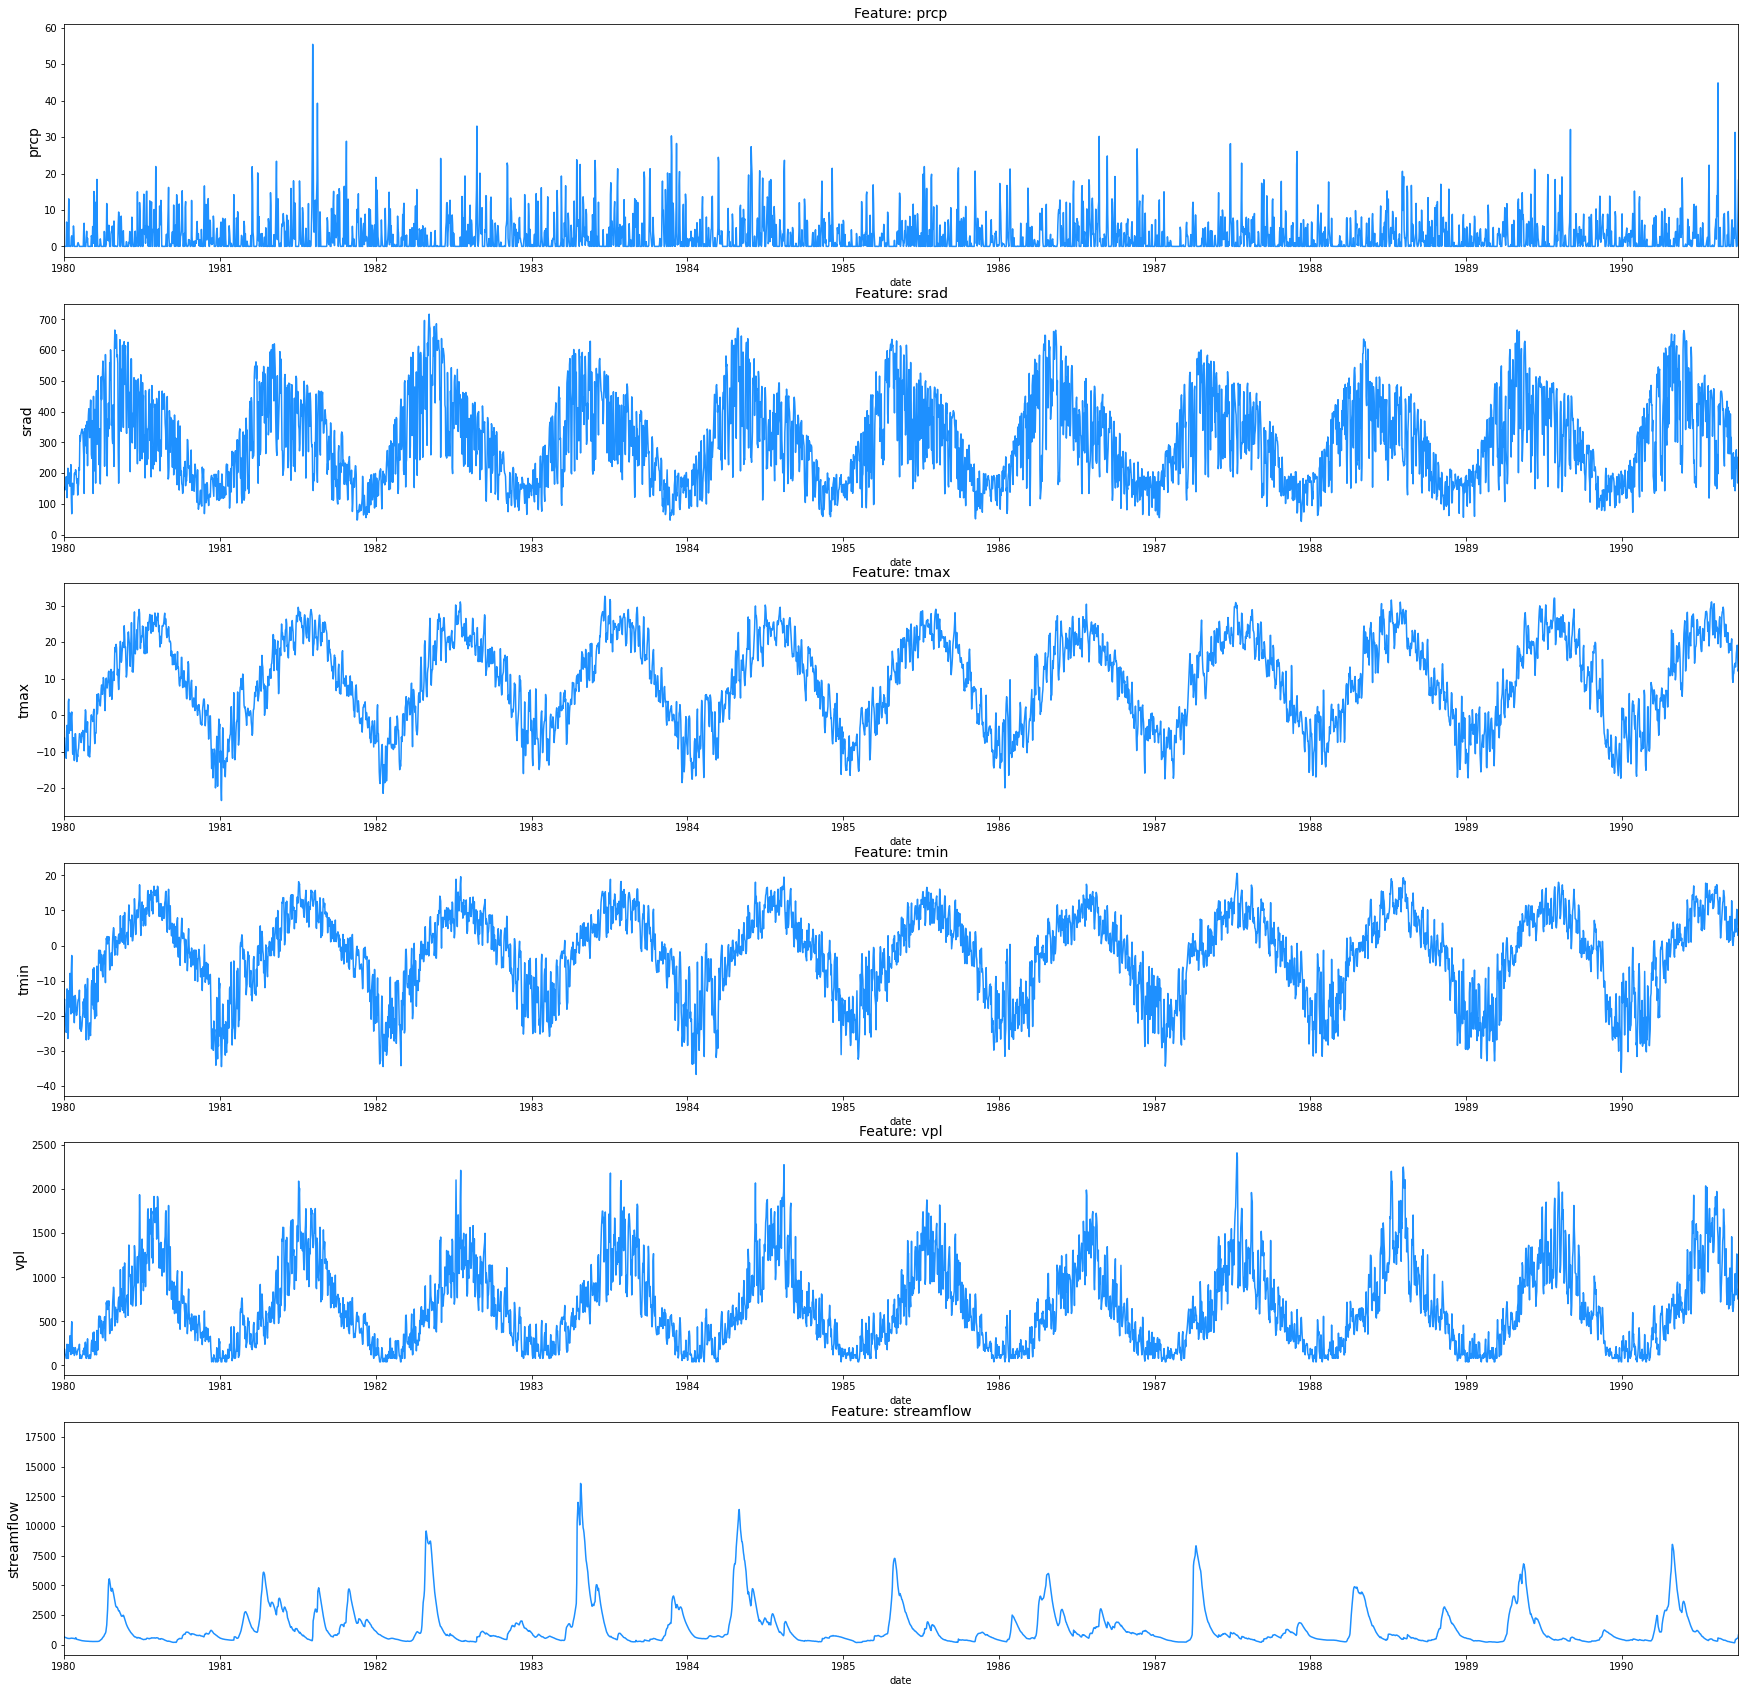

In [36]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(30, 30))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(1980, 1, 1), date(1990, 9, 30)]) 

## Prepraing Data for LSTM model

In [37]:
from sklearn.preprocessing import MinMaxScaler

univariate_df = df[['date','streamflow']].copy()
univariate_df.columns = ['d','s']
data = univariate_df.filter(['s'])

dataset = data.values
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.96567365],
       [-0.96651361],
       [-0.96735357],
       [-0.96763355],
       [-0.96847351],
       [-0.96959346],
       [-0.97043342],
       [-0.97127338],
       [-0.97211334],
       [-0.97239333]])

## Sliding window

In [38]:
train_size = int(0.85* len(df))
test_size = len(df) - train_size


train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

10787 1904


In [324]:
# Defines the rolling window
look_back = 365
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, window_size=1):
    X, Y = [], []
    for i in range(window_size, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

10057 1904


In [39]:
print(y_test)

NameError: name 'y_test' is not defined

In [70]:
def calc_nse(obs: np.array, sim: np.array) -> float:
    """Calculate Nash-Sutcliff-Efficiency.

    :param obs: Array containing the observations
    :param sim: Array containing the simulations
    :return: NSE value.
    """
    # 

    sim = np.delete(sim, np.argwhere(obs < 0), axis=0)
    obs = np.delete(obs, np.argwhere(obs < 0), axis=0)
    
    sim = np.delete(sim, np.argwhere(np.isnan(obs)), axis=0)
    obs = np.delete(obs, np.argwhere(np.isnan(obs)), axis=0)

    denominator = np.sum((obs - np.mean(obs)) ** 2)
    numerator = np.sum((sim - obs) ** 2)
    nse_val = 1 - numerator / denominator

    return nse_val

## Univariate LSTM model

In [327]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

model.summary()

Epoch 1/10
101/101 [==============================] - 4s 11ms/step - loss: 0.0345 - val_loss: 0.0083
Epoch 2/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0081
Epoch 3/10
101/101 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0061
Epoch 4/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 5/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 7/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 8/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.001

In [328]:
print(x_train.shape)

(10057, 1, 365)


In [329]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [330]:

# invert predictions
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
score_nse = calc_nse(y_test[0], test_predict[:,0])

60/60 [==============================] - 0s 2ms/step


In [331]:
print(score_nse)

0.8141663633709


In [332]:
y_test[0]

array([937., 886., 850., ..., 200., 196., 189.])

In [333]:
print(y_test[0])

[937. 886. 850. ... 200. 196. 189.]


In [334]:
test_predict[:,0]

array([1130.5597 , 1069.2385 , 1009.79175, ...,  477.4754 ,  453.4887 ,
        428.72073], dtype=float32)

## for 0.90 of train Data

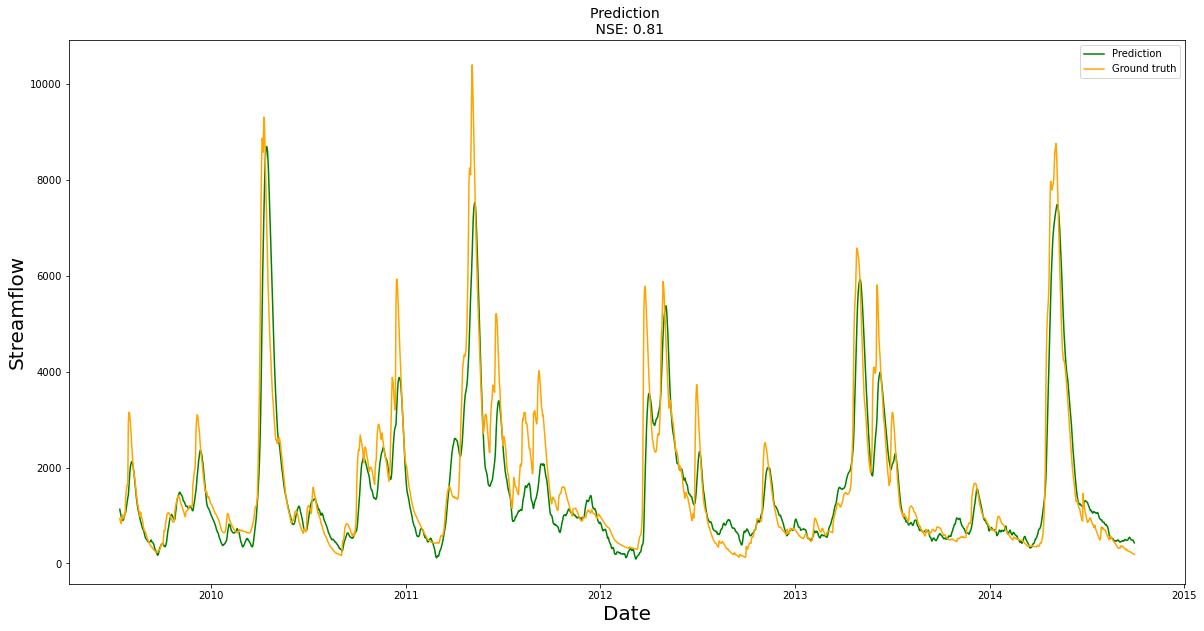

In [335]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)


sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()


## for 0.85 of train Data

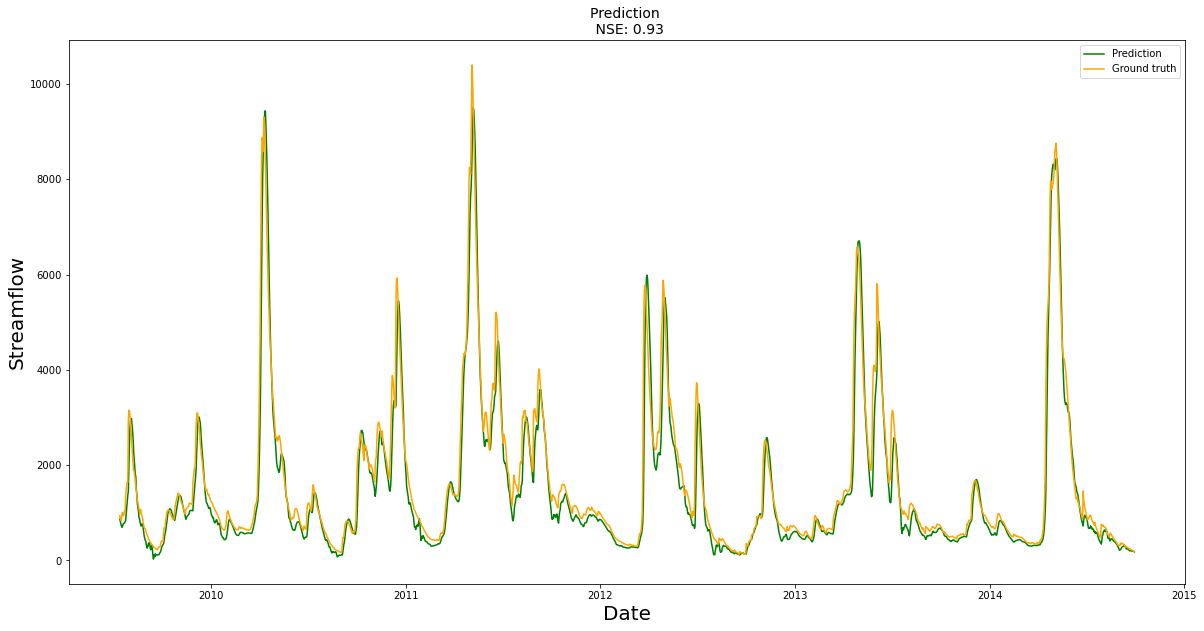

In [201]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()


## for 0.80 of train Data

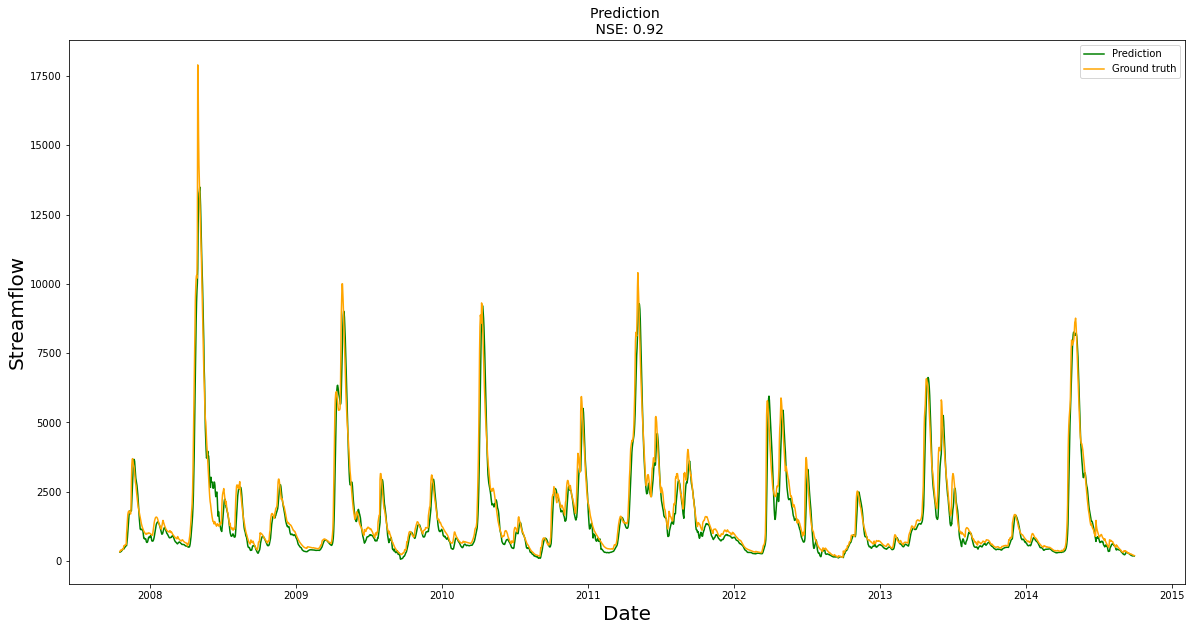

In [214]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()


## for different 0.75 train data

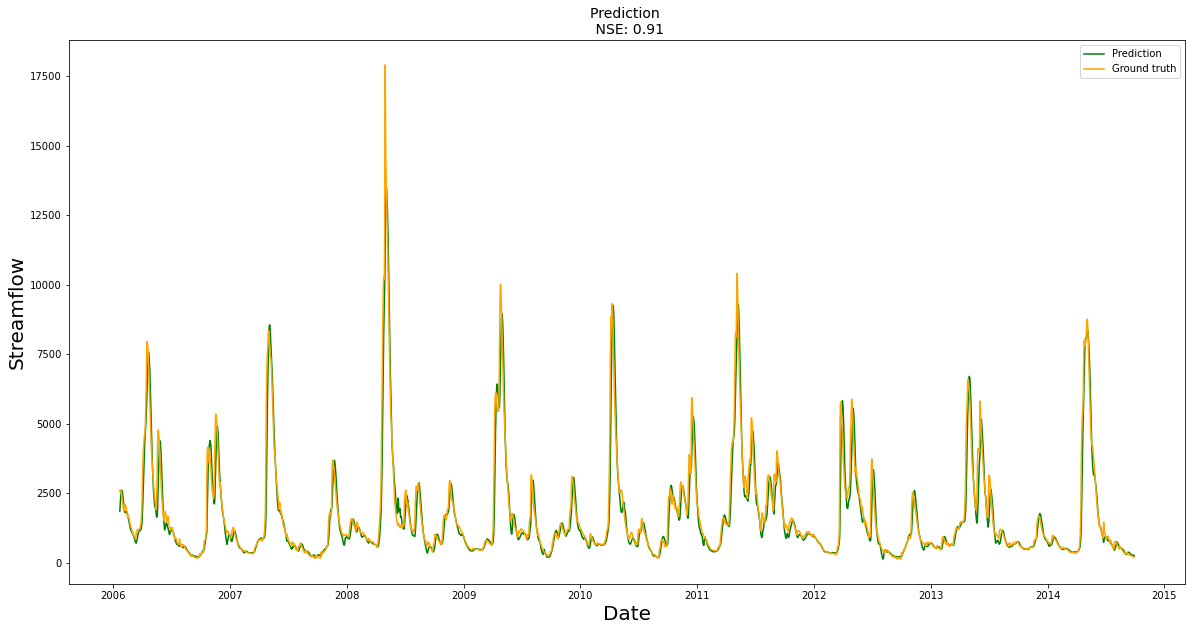

In [227]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()

## for 0.65 training data

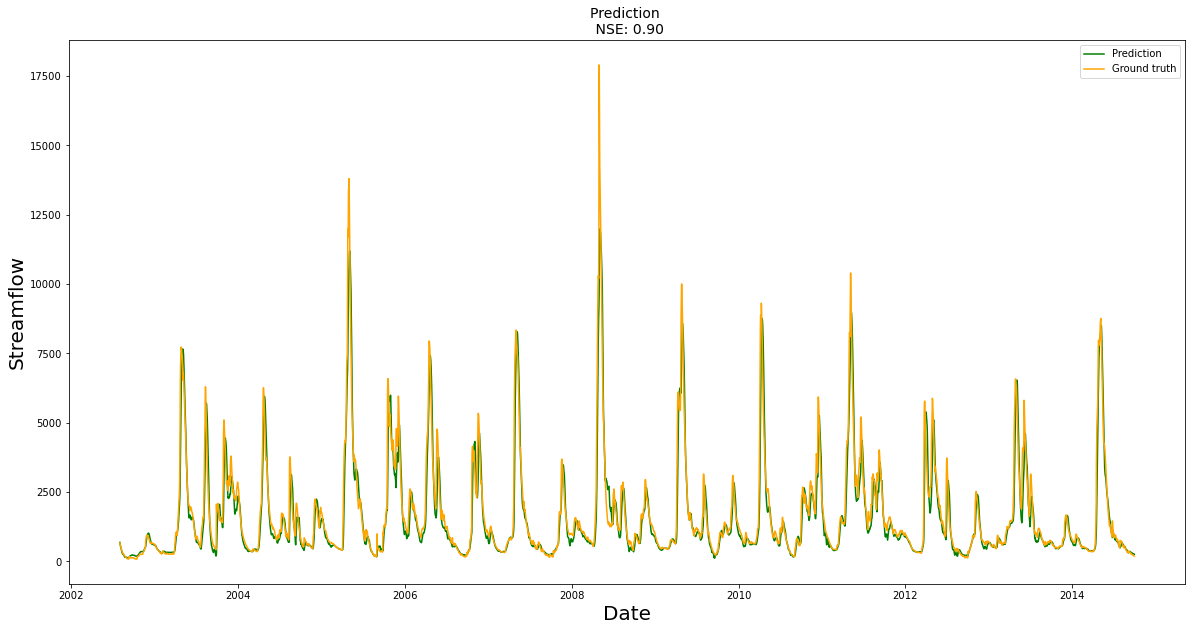

In [240]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()

## for 0.50 of train Data

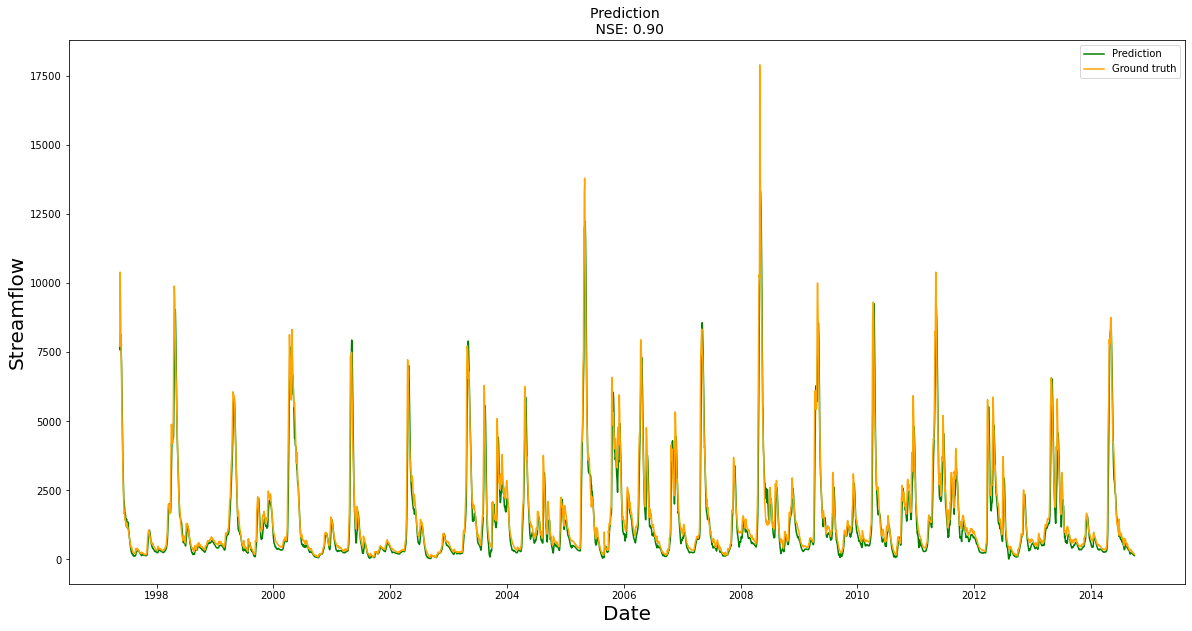

In [253]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()

## for 0.35 for train Data

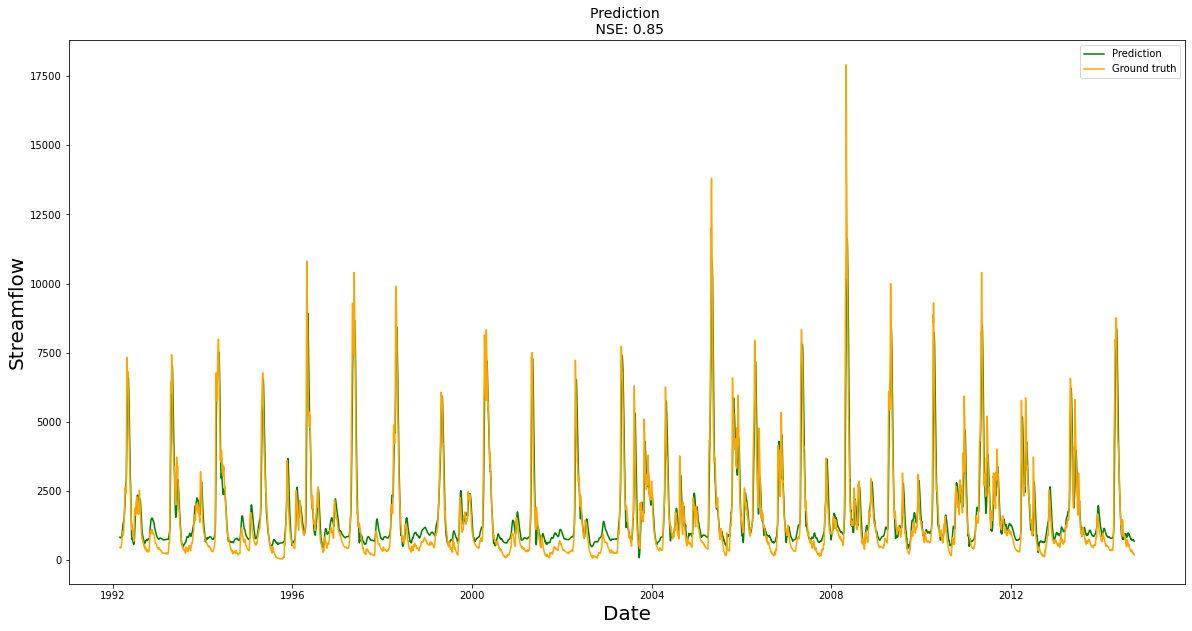

In [266]:
x_train_ticks = univariate_df.head(train_size)['d']
y_train = univariate_df.head(train_size)['s']
x_test_ticks = univariate_df.tail(test_size)['d']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)

# sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
ax.set_title(f'Prediction \n NSE: {score_nse:.2f}', fontsize=14)


ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()


## Multivariate LSTM model

In [167]:
df1 = df
df2_date = df1[['date']] 
df2= df1.drop(columns = ['date'])
train_size = (int)(0.80*10683)
df2_train = df2.iloc[0:train_size,]
df2_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prcp        8546 non-null   float64
 1   srad        8546 non-null   float64
 2   tmax        8546 non-null   float64
 3   tmin        8546 non-null   float64
 4   vpl         8546 non-null   float64
 5   streamflow  8546 non-null   float64
dtypes: float64(6)
memory usage: 400.7 KB


In [168]:
df2_train.head()

,prcp,srad,tmax,tmin,vpl,streamflow
0,0.0,153.40,-6.54,-16.30,171.69,655.0
1,0.0,145.27,-6.18,-15.22,185.94,640.0
2,0.0,146.96,-9.89,-18.86,138.39,625.0
3,0.0,146.20,-10.98,-19.76,120.06,620.0
4,0.0,170.43,-11.29,-22.21,117.87,605.0


In [169]:
df2_test = df2.iloc[train_size:10683,]
df2_test.head()

,prcp,srad,tmax,tmin,vpl,streamflow
8546,0.00,518.39,16.86,4.26,750.93,2490.0
8547,0.00,538.26,20.94,7.05,862.79,2340.0
8548,0.00,635.16,22.86,2.69,578.46,2210.0
8549,6.76,357.83,19.65,7.56,1033.69,2130.0
8550,5.62,258.35,15.03,7.20,1015.78,2060.0


In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
sc = StandardScaler()
df2_train_scaled = sc.fit_transform(df2_train)
df2_train_scaled

array([[-0.61666495, -1.02438371, -1.27885754, -1.11760253, -1.02866588,
        -0.4452102 ],
       [-0.61666495, -1.08055251, -1.24912956, -1.02773885, -0.99839144,
        -0.45379227],
       [-0.61666495, -1.06887659, -1.55549292, -1.33061275, -1.09941245,
        -0.46237434],
       ...,
       [-0.5566138 ,  1.0834318 ,  0.4478427 ,  0.58315093,  0.31985303,
         0.92505992],
       [-0.61666495,  0.74641898,  0.42719827,  0.66552598,  0.49489237,
         0.80491097],
       [-0.31433846,  1.2904204 ,  0.69557588,  0.71961061,  0.43374864,
         0.70764754]])

In [172]:
sc2 = StandardScaler()
df2_train_scaled_y = sc2.fit_transform(df2_train[['streamflow']])
df2_train_scaled_y

array([[-0.4452102 ],
       [-0.45379227],
       [-0.46237434],
       ...,
       [ 0.92505992],
       [ 0.80491097],
       [ 0.70764754]])

In [173]:
look_back = 10
no_records = 10683
no_col = 6
X_train = []
y_train = []
for i in range(look_back,train_size):
    X_train.append(df2_train_scaled[i-look_back:i])
    y_train.append(df2_train_scaled_y[i][0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [174]:
print(X_train.shape)
print(y_train.shape)

(8536, 10, 6)
(8536,)


In [175]:
X_train_shape = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))

In [176]:
print(X_train_shape.shape)

(8536, 10, 6)


In [177]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [180]:
model = Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(10,6)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [181]:
model.fit(X_train_shape,y_train,epochs=50,batch_size=100)

Epoch 1/50
86/86 [==============================] - 4s 17ms/step - loss: 0.1499
Epoch 2/50
86/86 [==============================] - 1s 16ms/step - loss: 0.0385
Epoch 3/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0267
Epoch 4/50
86/86 [==============================] - 1s 16ms/step - loss: 0.0232
Epoch 5/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0205
Epoch 6/50
86/86 [==============================] - 2s 20ms/step - loss: 0.0177
Epoch 7/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0162
Epoch 8/50
86/86 [==============================] - 1s 16ms/step - loss: 0.0162
Epoch 9/50
86/86 [==============================] - 1s 16ms/step - loss: 0.0149
Epoch 10/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0140
Epoch 11/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0142
Epoch 12/50
86/86 [==============================] - 2s 18ms/step - loss: 0.0137
Epoch 13/50
86/86 [==================

In [182]:
df1_train_last52 = df2_train.iloc[-look_back:]
df1_test_full = df2_test
full_df = pd.concat((df1_train_last52,df1_test_full),axis=0)
print(full_df.shape)
full_df.head()

(2147, 6)


,prcp,srad,tmax,tmin,vpl,streamflow
8536,0.0,664.31,16.17,-1.76,468.61,4870.0
8537,0.0,684.10,21.14,-0.61,480.16,4570.0
8538,0.0,681.50,25.73,2.58,579.15,4260.0
8539,0.0,670.70,28.00,5.26,690.56,3980.0
8540,0.0,663.45,28.90,6.27,738.50,3740.0


In [183]:
y_obs = df1_test_full['streamflow'].to_numpy()

In [184]:
y_obs

array([2490., 2340., 2210., ...,  635.,  626.,  712.])

In [185]:
y_obs.shape

(2137,)

In [186]:
full_df = sc.fit_transform(full_df)
full_df.shape

(2147, 6)

In [226]:
hops = 52
no_records = 0.20*10683
no_col = 6
X_train_shape_pred = []
for i in range(look_back,2147):
    X_train_shape_pred.append(full_df[i-look_back:i])
X_train_shape_pred = np.array(X_train_shape_pred)

In [227]:
print(X_train_shape_pred.shape)

(2137, 10, 6)


In [228]:
y_test = model.predict(X_train_shape_pred)

67/67 [==============================] - 0s 4ms/step


In [229]:
X_train_shape_pred

array([[[-0.56306883,  2.4382395 ,  0.55304073,  0.0738893 ,
         -0.41994053,  1.53525606],
        [-0.56306883,  2.5721164 ,  0.96023218,  0.16924947,
         -0.39595235,  1.3837538 ],
        [-0.56306883,  2.55452772,  1.33629028,  0.43377026,
         -0.1903601 ,  1.22720147],
        ...,
        [-0.51711646,  1.04589274,  0.40556697,  0.5631284 ,
          0.28167753,  0.61614235],
        [-0.56306883,  0.71590209,  0.3850845 ,  0.64522106,
          0.45279325,  0.51009077],
        [-0.33172238,  1.24856842,  0.65135658,  0.69912028,
          0.3930201 ,  0.42423949]],

       [[-0.56306883,  2.5721164 ,  0.96023218,  0.16924947,
         -0.39595235,  1.3837538 ],
        [-0.56306883,  2.55452772,  1.33629028,  0.43377026,
         -0.1903601 ,  1.22720147],
        [-0.56306883,  2.48146706,  1.52227108,  0.6560009 ,
          0.04102723,  1.08579936],
        ...,
        [-0.56306883,  0.71590209,  0.3850845 ,  0.64522106,
          0.45279325,  0.51009077],
  

In [230]:
print(y_test[0])

[0.39805186]


In [231]:
y_final_pred = sc2.inverse_transform(y_test)
y_final_pred

array([[2128.8792 ],
       [1948.5839 ],
       [1809.9724 ],
       ...,
       [ 412.21573],
       [ 424.32327],
       [ 453.76785]], dtype=float32)

In [232]:
final_streamflow_pred = pd.DataFrame(y_final_pred)
final_streamflow_pred

,0
0,2128.879150
1,1948.583862
2,1809.972412
3,1693.432739
4,1652.376465
...,...
2132,416.077423
2133,416.327240
2134,412.215729
2135,424.323273


In [233]:
final_streamflow_pred.columns=['streamflow_pred']

In [234]:
final_streamflow_pred.shape

(2137, 1)

In [235]:
y_pred =  final_streamflow_pred.to_numpy().ravel()

In [236]:
y_pred.shape

(2137,)

In [237]:
nse_val = calc_nse(y_obs, y_pred)

In [238]:
print(nse_val)

0.9389058222572719


In [239]:
df2_test.index = np.arange(0, len(df2_test))

In [240]:
df2_test.shape

(2137, 6)

In [241]:
fully_final = pd.concat((final_streamflow_pred,df2_test),axis=1)

In [242]:
fully_final.head()

,streamflow_pred,prcp,srad,tmax,tmin,vpl,streamflow
0,2128.879150,0.00,518.39,16.86,4.26,750.93,2490.0
1,1948.583862,0.00,538.26,20.94,7.05,862.79,2340.0
2,1809.972412,0.00,635.16,22.86,2.69,578.46,2210.0
3,1693.432739,6.76,357.83,19.65,7.56,1033.69,2130.0
4,1652.376465,5.62,258.35,15.03,7.20,1015.78,2060.0


In [243]:
fully_final.shape

(2137, 7)

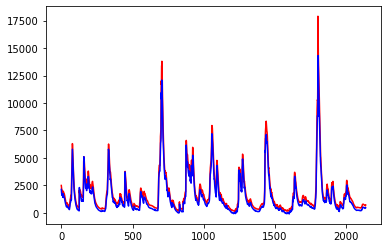

In [244]:
plt.plot(fully_final['streamflow'],label='actual',color='red')
plt.plot(fully_final['streamflow_pred'],label='prediction',color='blue')

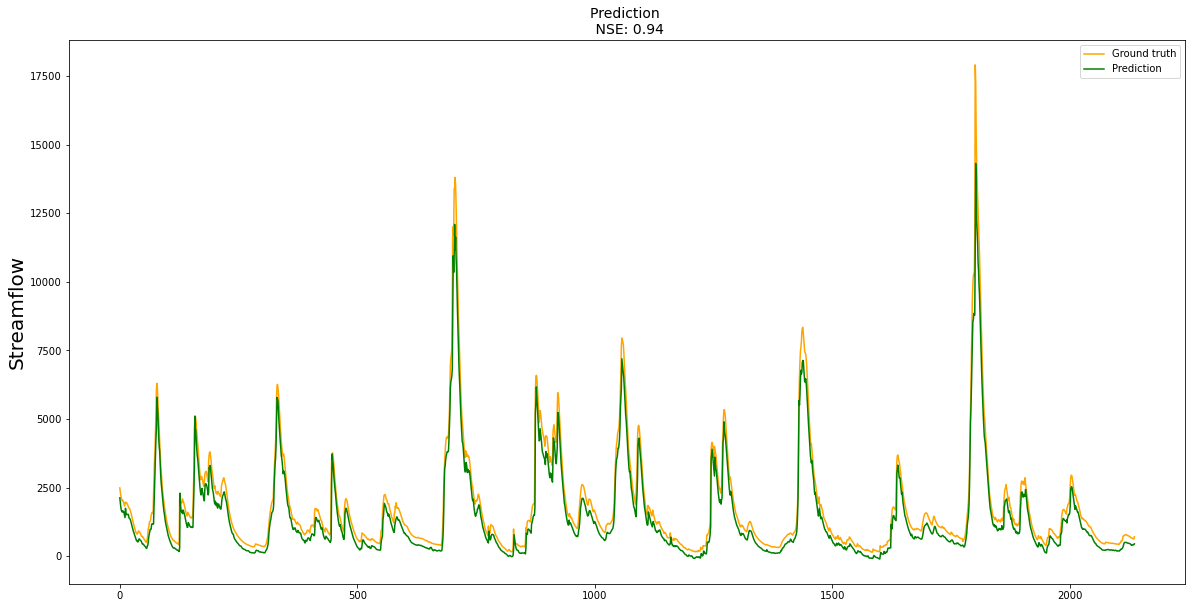

In [245]:
y_train = fully_final['streamflow']
x_test_ticks = fully_final['streamflow_pred']
x_date = []

for i in range(0,2137):
    x_date.append(i)

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)


sns.lineplot(x=x_date, y=fully_final['streamflow'], ax=ax, color='orange', label='Ground truth') #navajowhite
sns.lineplot(x=x_date, y=fully_final['streamflow_pred'], ax=ax, color='green', label='Prediction') #navajowhite
ax.set_title(f'Prediction \n NSE: {nse_val:.2f}', fontsize=14)


ax.set_ylabel(ylabel='Streamflow', fontsize=20)

plt.show()


In [ ]:
## P?S